Optimization -> overcome the problem of overfitting
Ridge -> L2 Normalization alpha to reduce the coefficients.

### best alpha, Elastic Net, ElasticNetCv

In [1]:
from sklearn.linear_model import ElasticNet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

In [2]:
data = load_boston()

In [3]:
x = data.data
y = data.target

In [4]:
#split the data

from sklearn.model_selection import train_test_split

In [5]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y ,test_size = 0.2)

In [6]:
xtrain.shape,ytrain.shape

((404, 13), (404,))

In [7]:
xtest.shape,ytest.shape

((102, 13), (102,))

In [8]:
#list of alphas

alpha = [0.001, 0.0001, 0.1, 0.01, 0.3, 0.5, 0.7, 1]

In [9]:
for i in alpha:
    model = ElasticNet(alpha = i).fit(x,y)
    rscore = model.score(x,y)
    ypred = model.predict(x)
    mse = mean_squared_error(y,ypred)
    print("For Alpha: ",i,"R Square is: ",rscore,"MSE is: ",mse,"RMSE is: ",np.sqrt(mse))

For Alpha:  0.001 R Square is:  0.7403882874469548 MSE is:  21.916305546670102 RMSE is:  4.681485399600228
For Alpha:  0.0001 R Square is:  0.7406393296766047 MSE is:  21.895112673066603 RMSE is:  4.6792213746591
For Alpha:  0.1 R Square is:  0.7256797684938825 MSE is:  23.157992188403018 RMSE is:  4.812275157179088
For Alpha:  0.01 R Square is:  0.7356440082946996 MSE is:  22.316815486984442 RMSE is:  4.724067684420328
For Alpha:  0.3 R Square is:  0.7148037598752911 MSE is:  24.076140008735138 RMSE is:  4.9067443390434695
For Alpha:  0.5 R Square is:  0.7056176997612844 MSE is:  24.85162312638344 RMSE is:  4.985140231365959
For Alpha:  0.7 R Square is:  0.697335342418664 MSE is:  25.55081605717421 RMSE is:  5.054781504395042
For Alpha:  1 R Square is:  0.6861018474345026 MSE is:  26.499142717819627 RMSE is:  5.147731803213881


#####  0.001 is the choen alpha in order to avoid overfitting

In [10]:
model_tr = ElasticNet(alpha =  0.001).fit(xtrain,ytrain)

In [11]:
ypred = model_tr.predict(xtest)

In [12]:
model_tr.score(xtest,ytest) #rscore

0.7920410109442257

In [13]:
mean_squared_error(ytest,ypred)

15.7660897420605

In [14]:
np.sqrt(mean_squared_error(ytest,ypred))

3.9706535661098035

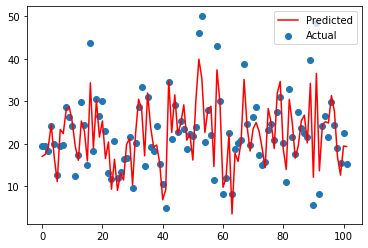

In [15]:
plt.scatter(range(xtest.shape[0]),ytest, label = "Actual")
plt.plot(range(xtest.shape[0]),ypred, color ="r", label ="Predicted")
plt.legend()

In [16]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to t

In [17]:
from sklearn.linear_model import ElasticNetCV

In [27]:
model_cv = ElasticNetCV(alphas = alpha, cv = 5)
model_cv.fit(xtrain,ytrain)
ypred = model_cv.predict(xtest)
rscore = model_cv.score(xtest,ytest)
mse = mean_squared_error(ytest,ypred)

In [28]:
rscore,mse

(0.7920410109442257, 15.7660897420605)

In [30]:
model_cv.alpha_

0.001